# 과제 1: PCA 실습  
Iris 데이터를 2D로 축소  
→ 설명된 분산 확인 및 시각화

In [108]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [186]:
# 데이터 로드
iris = load_iris()
X = iris.data # (150, 4) 4차원 데이터

In [187]:
# 1. 데이터 표준화 (필수!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [188]:
# 2. PCA (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # (150, 2) 2차원으로 축소 됨

In [189]:
# 3. 설명된 분산 확인
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f'PC{i+1}: {var*100:.2f}%')
print(f'총 {sum(pca.explained_variance_ratio_)*100:.2f}% 보존')

PC1: 72.96%
PC2: 22.85%
총 95.81% 보존


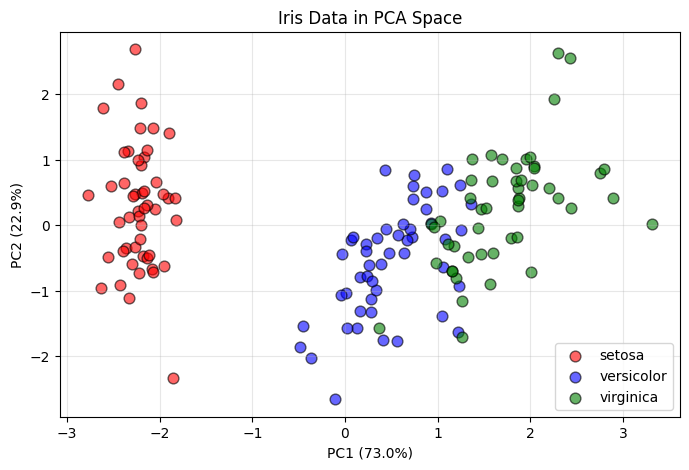

In [207]:
# 4. PCA 시각화
plt.figure(figsize=(8, 5))

colors = ['red', 'blue', 'green']
for i in range(3):
    mask = iris.target == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
               c=colors[i], label=iris.target_names[i],
               s=60, alpha=0.6, edgecolors='black')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Iris Data in PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
# 과제 2: K-Means 최적 K 찾기  
Elbow Method와 Silhouette Score 사용  
→ 최적 K 선택 및 결과 비교

In [165]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [191]:
# 데이터 생성
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

In [192]:
# K-Means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

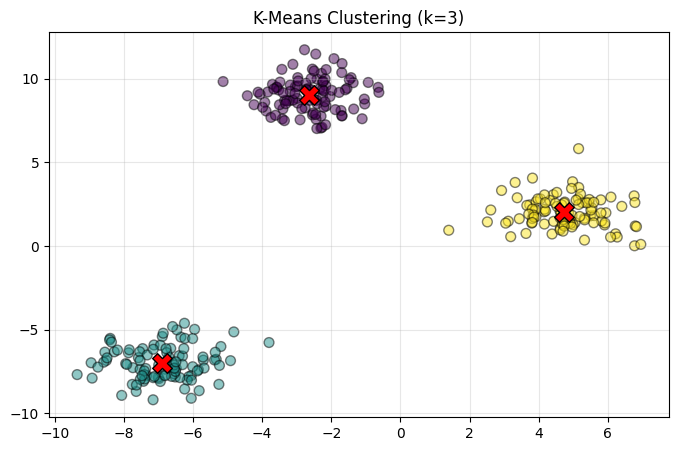

In [197]:
# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.5, ec='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', ec='black')
plt.title('K-Means Clustering (k=3)')
plt.grid(True, alpha=0.3)
plt.show()

In [201]:
# 최적 K 선택
inertias = []
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

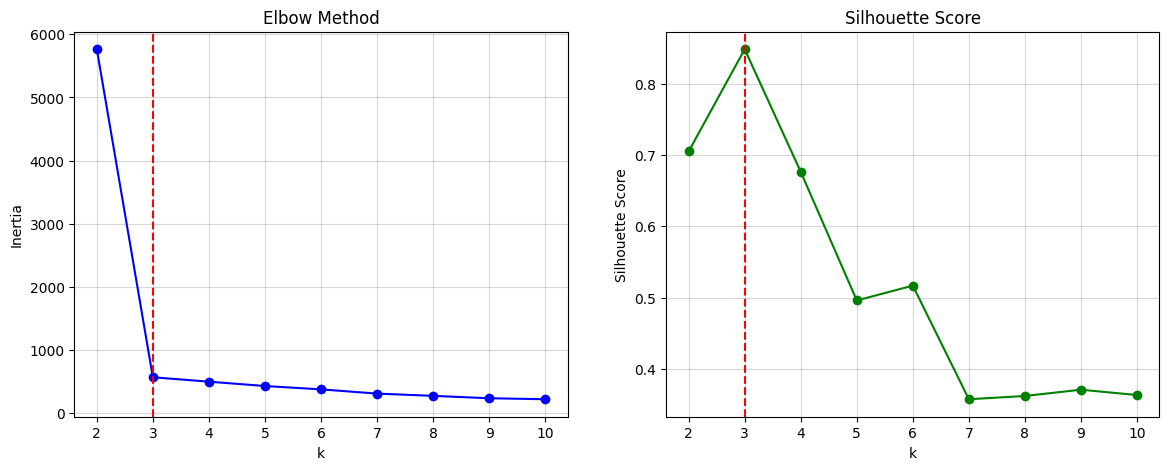

In [202]:
# Elbow Method Silhouette Score 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(range(2,11), inertias, 'bo-')
ax[0].axvline(x=3, color='red', linestyle='--')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Method')
ax[0].grid(True, alpha=0.5)

ax[1].plot(range(2,11), silhouettes, 'go-')
ax[1].axvline(x=3, color='red', linestyle='--')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score')
ax[1].grid(True, alpha=0.5)


# 과제 3: 알고리즘 비교  
같은 데이터로 K-Means와 Hierarchical 실행  
→ 결과와 성능 비교 분석

In [166]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [203]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

In [204]:
# Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_h = clustering.fit_predict(X)
silhouette_k = silhouette_score(X, labels_h)

In [205]:
# K-Means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_k = kmeans.fit_predict(X)
silhouette_h = silhouette_score(X, labels_h)

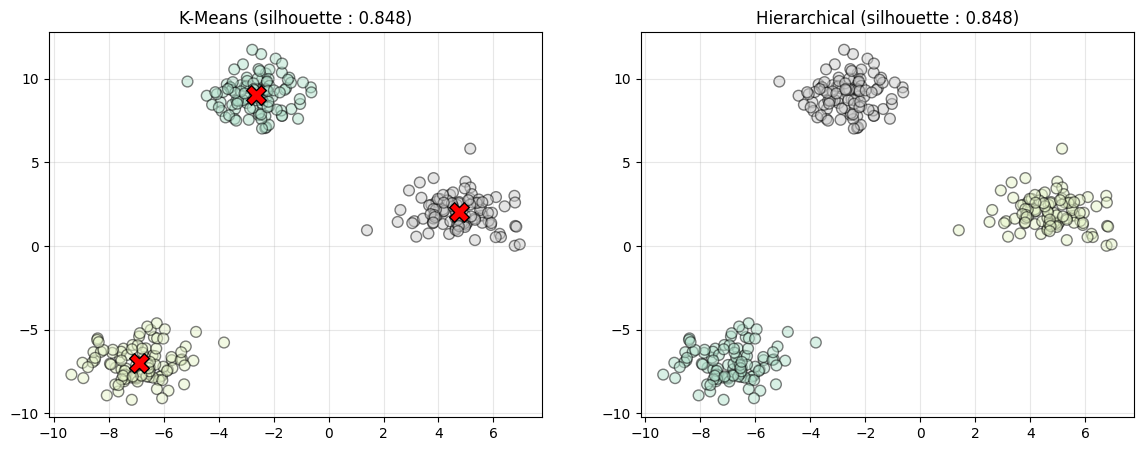

In [206]:
# K-Means, Hierarchical 비교 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=labels_k, s=60, alpha=0.5, ec='black', cmap='Pastel2')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', ec='black')
ax[0].set_title(f'K-Means (silhouette : {silhouette_k:.3f})')
ax[0].grid(True, alpha=0.3)

ax[1].scatter(X[:, 0], X[:, 1], c=labels_h, s=60, alpha=0.5, ec='black', cmap='Pastel2')
ax[1].set_title(f'Hierarchical (silhouette : {silhouette_h:.3f})')
ax[1].grid(True, alpha=0.3)

plt.show()